In [27]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import tensorflow as tf
import sklearn.metrics as metrics
%matplotlib inline
import warnings
warnings.simplefilter(action="ignore")
columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width']
df = pd.read_csv('C://Users/Nidhi/Desktop/IRIS.csv')
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


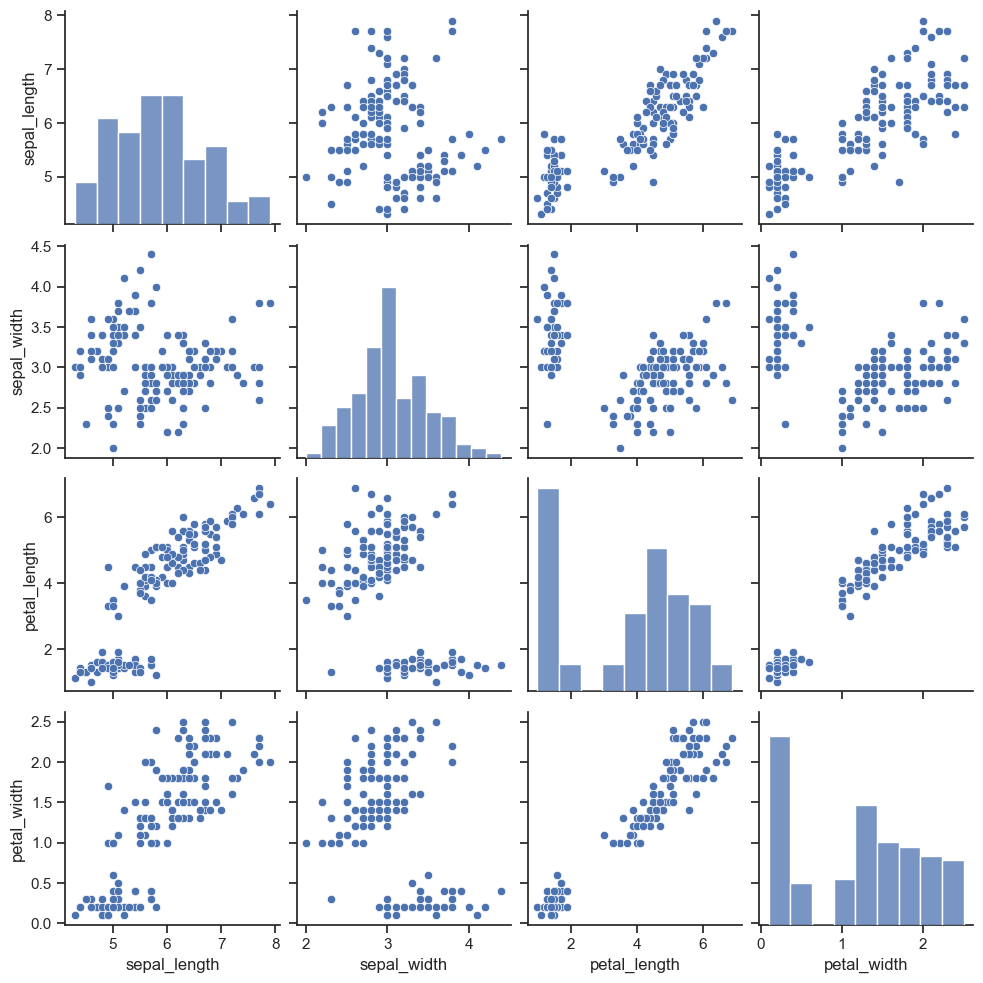

In [3]:
sns.set(style="ticks", color_codes=True)
iris = sns.load_dataset("iris")
g = sns.pairplot(iris)
plt.show()

In [4]:
print(df.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [5]:
# class distribution
print(df.groupby('species').size())

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


Text(0, 0.5, 'count')

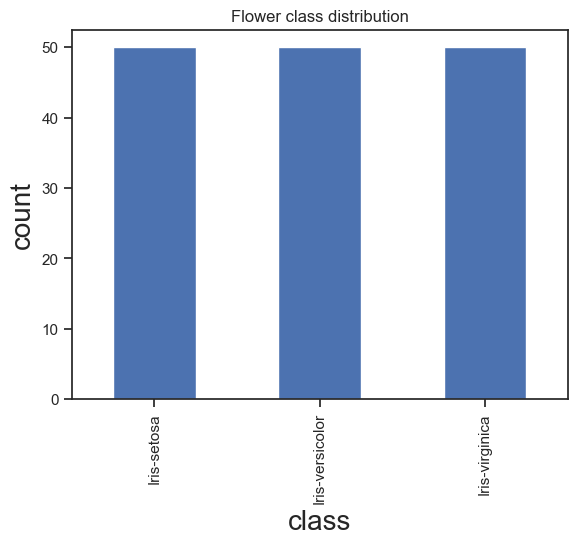

In [6]:
nameplot = df['species'].value_counts().plot.bar(title='Flower class distribution')
nameplot.set_xlabel('class',size=20)
nameplot.set_ylabel('count',size=20)

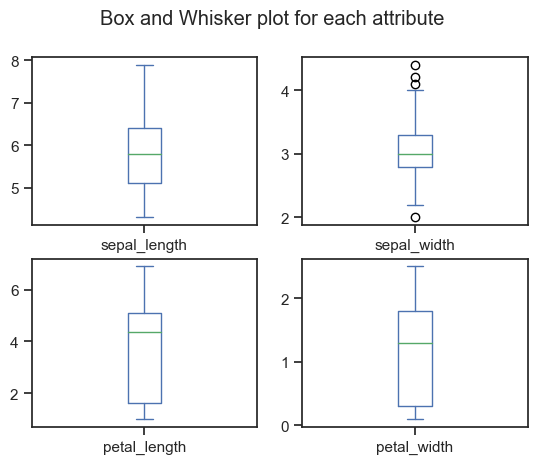

In [7]:
# box and whisker plots
df.plot(kind='box', subplots=True, layout=(2,2), 
               sharex=False, sharey=False, title="Box and Whisker plot for each attribute")
plt.show()

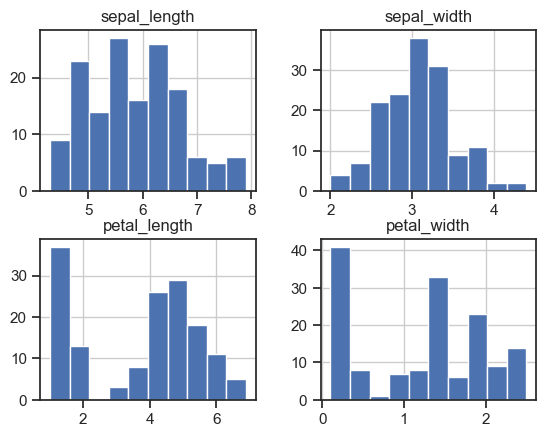

In [8]:
# plot histogram
df.hist()
plt.show()

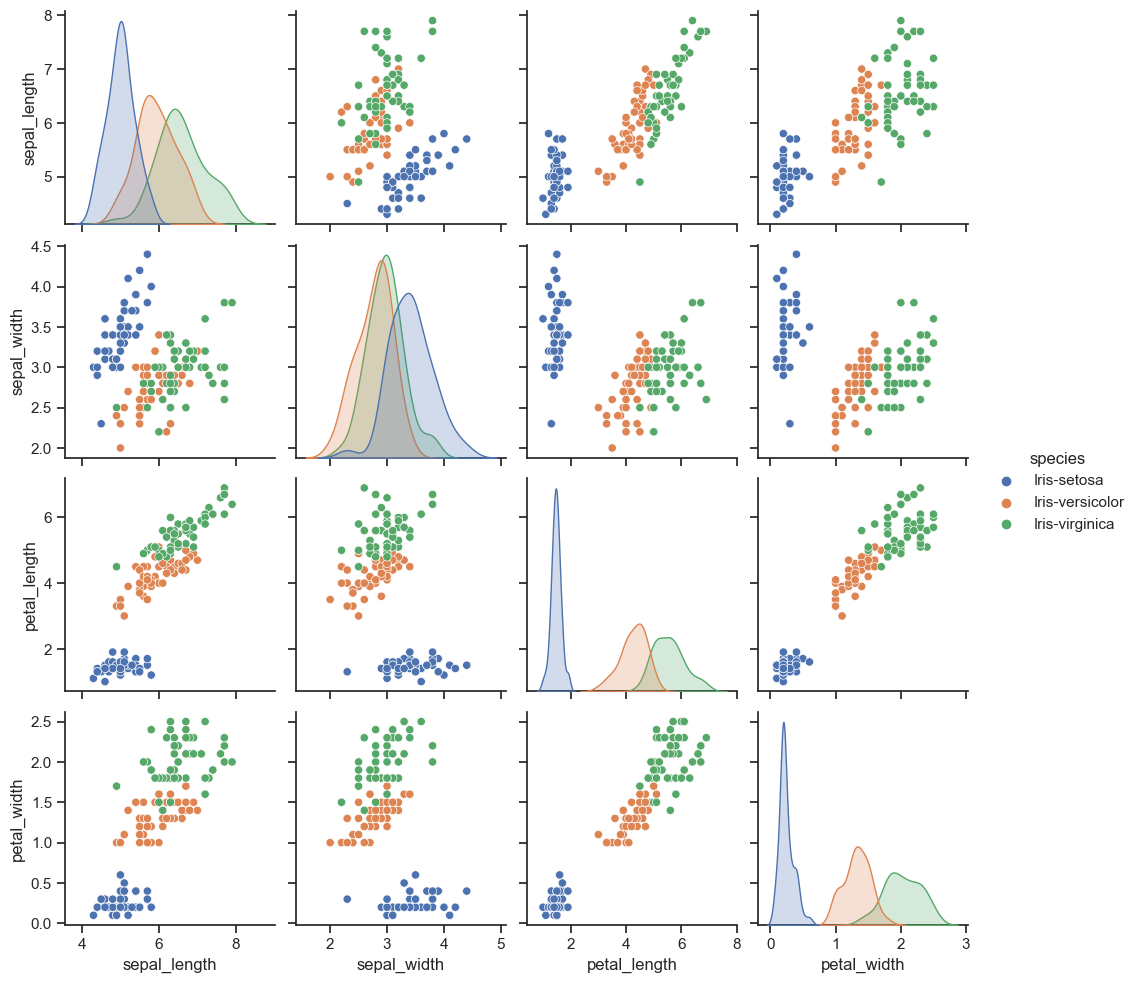

In [9]:

sns.set(style="ticks")
sns.pairplot(df, hue="species")

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# we will split data to 80% training data and 20% testing data with random seed of 10
X = df.drop(['species'], axis=1)
Y = df['species']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

In [12]:
print("X_train.shape:", X_train.shape)
print("X_test.shape:", X_test.shape)
print("Y_train.shape:", X_train.shape)
print("Y_test.shape:", Y_test.shape)

X_train.shape: (120, 4)
X_test.shape: (30, 4)
Y_train.shape: (120, 4)
Y_test.shape: (30,)


In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

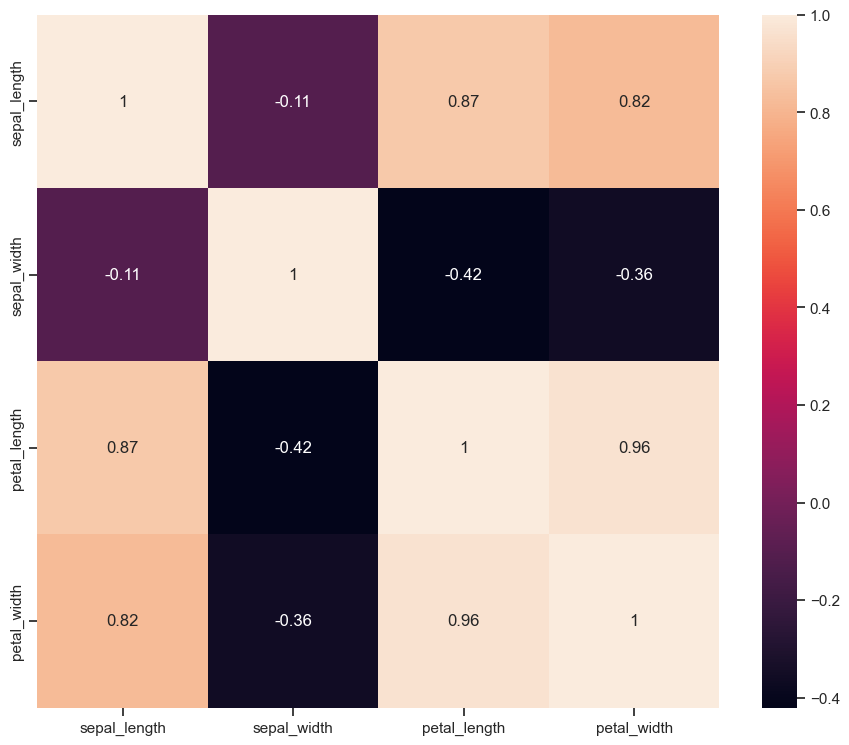

In [14]:
plt.figure(figsize=(11,9))
# Plotting the heatmap
sns.heatmap(df.corr(), annot=True)
plt.show()

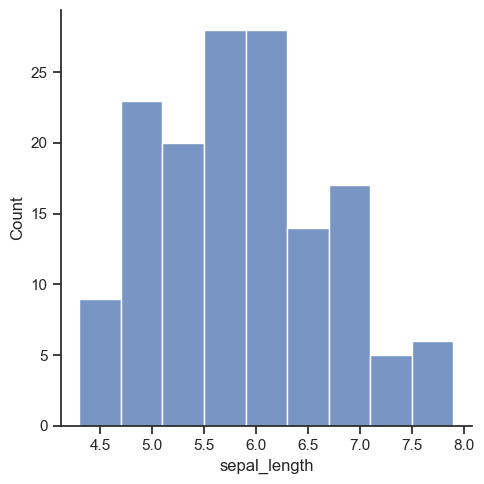

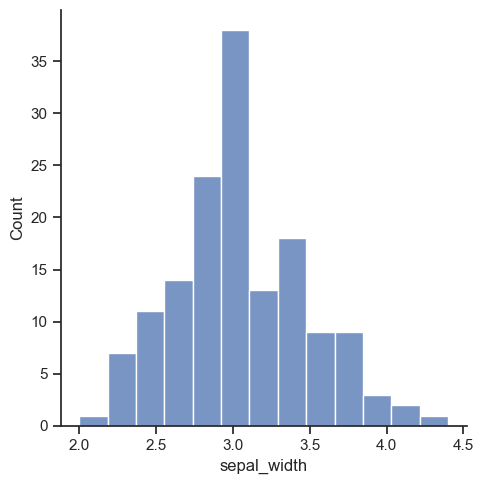

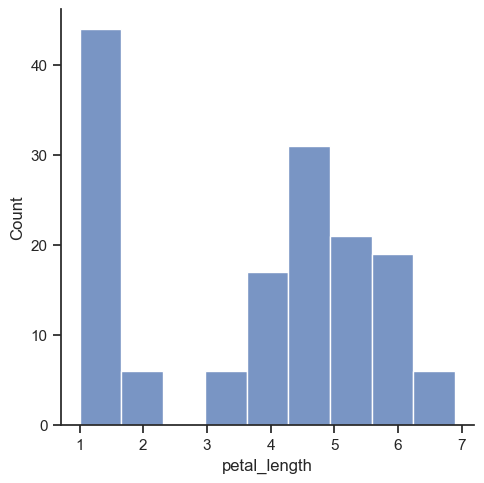

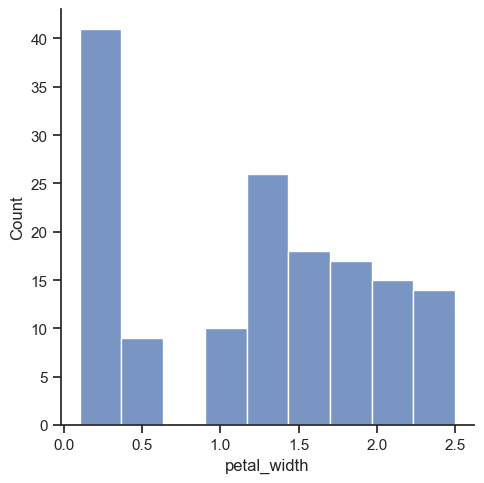

In [15]:
# Plotting the distplot
sns.displot(df['sepal_length'])
plt.show()

sns.displot(df['sepal_width'])
plt.show()

sns.displot(df['petal_length'])
plt.show()

sns.displot(df['petal_width'])
plt.show()

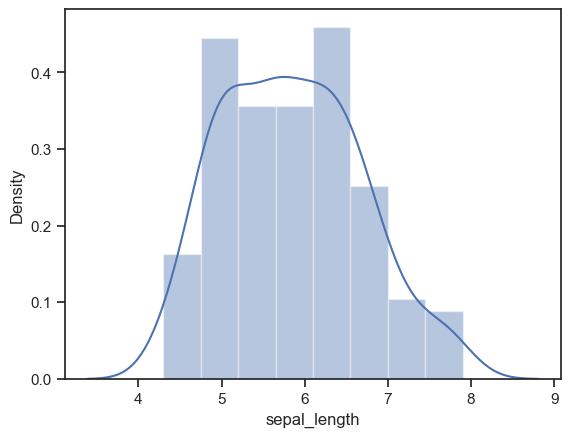

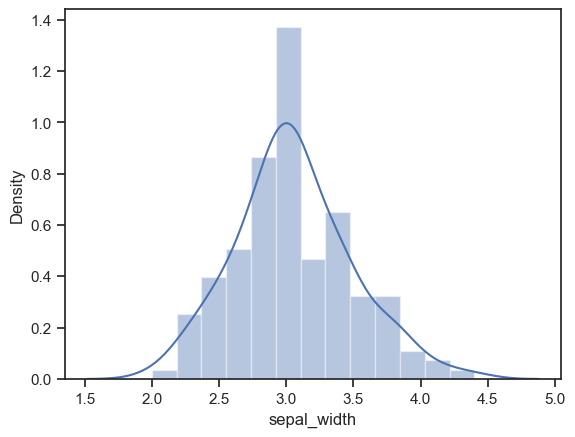

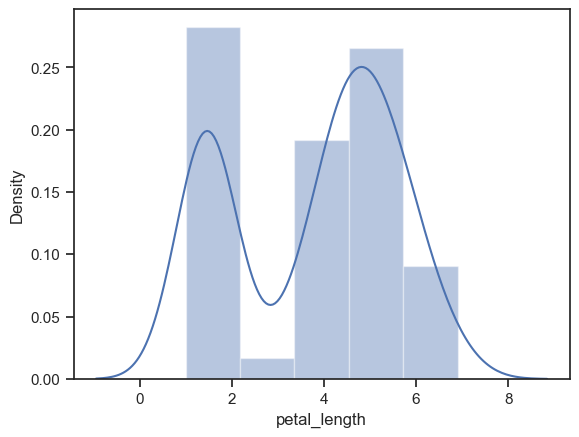

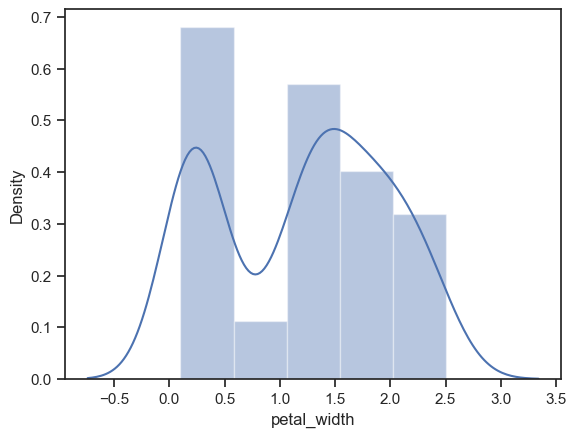

In [16]:
# Plotting the distplot
sns.distplot(df['sepal_length'])
plt.show()

sns.distplot(df['sepal_width'])
plt.show()

sns.distplot(df['petal_length'])
plt.show()

sns.distplot(df['petal_width'])
plt.show()

<Axes: xlabel='species', ylabel='petal_length'>

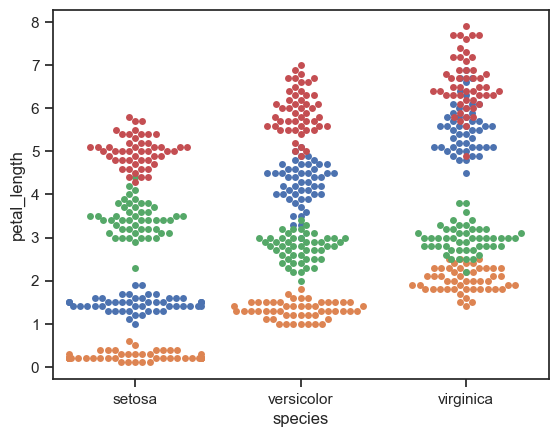

In [17]:
# Plotting the swarmplot
sns.swarmplot(x='species', y='petal_length', data=iris)
sns.swarmplot(x='species', y='petal_width', data=iris)
sns.swarmplot(x='species', y='sepal_width', data=iris)
sns.swarmplot(x='species', y='sepal_length', data=iris)

In [18]:
train, test = train_test_split(df, test_size = 0.3) # the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [19]:
X_train= train[['petal_length','sepal_width','petal_length','petal_width']]   # taking the training data features
y_train=train.species                                                              # output of our training data
X_test= test[['petal_length','sepal_width','petal_length','petal_width']]      # taking test data features
y_test=test.species 

In [20]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:


from sklearn.linear_model  import LogisticRegression  # Train a logistic regression model on the training data
model = LogisticRegression()
model.fit(X_train, y_train)
prediction=model.predict(X_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,y_test))

The accuracy of the Logistic Regression is 0.9555555555555556


In [22]:
# Evaluate the performance of the model on the test data
y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred, average='micro')
print("F1 score:", f1)

F1 score: 0.9555555555555556


In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      1.00      0.97        15
 Iris-virginica       1.00      0.94      0.97        16

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

[[14  0  0]
 [ 0 15  0]
 [ 0  1 15]]
accuracy is 0.9777777777777777


In [24]:
from sklearn import svm
model = svm.SVC() #select the algorithm
model.fit(X_train, y_train) # train the algorithm with the training data and the training output
prediction=model.predict(X_test) #pass the testing data to the trained algorithm
#check the accuracy of the algorithm. 
print('The accuracy of the SVM is:',metrics.accuracy_score(prediction,y_test))

The accuracy of the SVM is: 0.9555555555555556


In [25]:
# A detailed classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.88      1.00      0.94        15
 Iris-virginica       1.00      0.88      0.93        16

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45

